In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [2]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, classification_report,precision_recall_curve
from sklearn import preprocessing


In [28]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [4]:
import tensorflow as tf

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [5]:
df = pd.read_csv('./input/Train_dt_v3.csv')

In [7]:
def drop_col(df,columns):
    df.drop(columns=columns, axis=1, inplace=True)
    return df

In [8]:
df = drop_col(df,['Col1'])

In [9]:
df_0 =  df[df['Col2'] == 0]

In [10]:
df_1 = df[df['Col2'] == 1]
df_1.head()

,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,1,10867.110000,8648.345000,15766.179090,28904.661670,5273.655000,23461.531670,12855.971630,28715.088760,9114.586439,...,0,1,0,1,214.0,214.0,68.0,22.0,22.0,7.0
40,1,121155.360000,126414.303300,108456.508600,126414.303300,119791.583300,119791.583300,85149.821140,85149.821140,95135.691920,...,0,0,0,0,6.0,6.0,4.0,8.0,6.0,1.0
60,1,2564.933333,754.330000,827.097500,1654.195000,7686.166667,19447.333330,1525.250405,1783.674600,12993.704910,...,0,0,0,0,60.0,60.0,54.0,17.0,17.0,13.0
69,1,1124.356667,1802.221667,1544.761429,1802.221667,184.663333,184.663333,1422.240068,1422.240068,208.718556,...,2,0,2,0,106.0,106.0,23.0,25.0,25.0,6.0
75,1,11568.503330,3969.626000,3696.033636,8129.210000,13085.339000,31545.878000,5776.845493,5688.282954,19372.588090,...,1,1,1,1,90.0,88.0,62.0,30.0,28.0,18.0


In [29]:
def getX_and_Y(df):
    Y = df['Col2'].to_numpy()
    Y = to_categorical(Y)
    X = df[df.columns.difference(['Col2'])].to_numpy()
    return X, Y




In [65]:
df.head()

,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,1,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,9.114586e+03,...,0,1,0,1,214.0,214.0,68.0,22.0,22.0,7.0
1,0,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,2.013518e+05,...,0,0,0,0,41.0,41.0,38.0,12.0,12.0,11.0
2,0,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,9.368338e+06,...,0,1,1,0,378.0,378.0,310.0,21.0,21.0,16.0
3,0,6.727043e+05,8.181116e+05,6.794893e+05,6.794893e+05,8.257254e+05,7.605803e+05,3.577134e+05,4.236612e+05,4.304848e+05,...,0,0,0,0,702.0,702.0,644.0,951.0,951.0,743.0
4,0,-1.218742e+06,-3.005361e+06,-1.666241e+05,-2.403574e+06,2.583183e+06,2.086546e+06,5.938358e+06,5.446532e+06,3.473444e+06,...,0,0,0,0,1305.0,1305.0,1211.0,2205.0,2205.0,1831.0


In [67]:
Y[1]

array([1., 0.], dtype=float32)

In [30]:
X, Y = getX_and_Y(df)

In [31]:
def normalize_train_X(X):
    scaler = preprocessing.MinMaxScaler()
    X_transformed = scaler.fit_transform(X)
    return X_transformed, scaler

In [18]:
X_transformed, transformer = normalize_train_X(X)

In [22]:
X_transformed = transformer.transform(full_X)

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X_transformed,Y, test_size=0.20, random_state=42, stratify=Y)
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train, test_size=0.05, random_state=42, stratify=Y_train)

print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

(13315, 2171) (701, 2171) (13315, 2) (701, 2)


In [103]:
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, Flatten, Reshape, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


In [25]:
X_train.shape

(15768, 2171)

In [39]:
input_shape = X_train.shape[1]

In [79]:
from sklearn.utils import class_weight

array([0, 1])

In [81]:
weights = class_weight.compute_class_weight('balanced',
                                            np.unique(np.argmax(Y_train, axis=1)),
                                            np.argmax(Y_train, axis=1))
print(weights)

[0.55590347 4.97199403]


In [92]:
class_weights = dict(enumerate(weights))
class_weights

{0: 0.5559034736138945, 1: 4.971994025392084}

In [ ]:
def basic_model(input_shape):
    learning_rate = 0.001
    input_layer = Input(shape=(input_shape,))
    h = Dense(512,  activation='relu', activity_regularizer=regularizers.l2(learning_rate))(input_layer)
    h= Dropout(0.8)(h)
    h = Dense(256, activation='relu')(h)
    h = Dense(128, activation='relu')(h)
    h = Dense(64, activation='relu')(h)
    h = Dense(32, activation='relu')(h)
    output = Dense(2, activation='softmax')(h)
       

    model = Model(input_layer, output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[ 'accuracy'])
    return model


In [ ]:
model = basic_model(input_shape)
model.summary()

In [ ]:
experiment_no = 2

In [ ]:
mcp_save = ModelCheckpoint(filepath='./model_{}.hdf5'.format(experiment_no), save_best_only=True, monitor='val_acc', mode='max')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, epsilon=1e-4, mode='min')


In [ ]:
history = model.fit(X_train, Y_train,
                epochs=50,
                batch_size=64,
                shuffle=True,
                validation_data=(X_val, Y_val),
                verbose=1,
                class_weight=class_weights,
                callbacks=[ mcp_save]) 

In [211]:
model.load_weights('./model_{}.hdf5'.format(experiment_no))

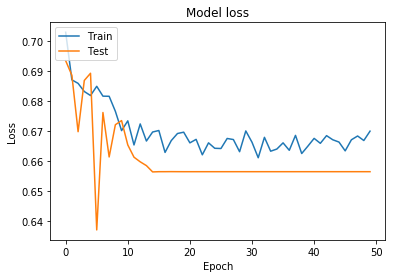

In [190]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [171]:
def accuracy(Y_test, predictions):
    accuracy = accuracy_score(Y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [172]:
def mse(y_true, y_pred):
    return np.mean(np.square(y_pred - y_true), axis=-1 )

def predict(model,X_test):
    Y_pred = model.predict(X_test)
    return Y_pred

def evaluate(Y_test, Y_pred):
    Y_pred = np.argmax(Y_pred, axis=1)
    Y_true = np.argmax(Y_test, axis=1)
    print(Y_pred, Y_true)
    conf_matrix = confusion_matrix(Y_true, Y_pred)
    print(conf_matrix)
    print(f1_score(Y_true, Y_pred))
    print(classification_report(Y_true, Y_pred))
    return Y_pred

def plot_sample(loss, plt, title):


    plt.plot(loss)
    plt.set_ylabel('Loss')
    plt.set_xlabel('Epoch')
   

In [207]:
Y_pred = predict(model,X_test)

In [192]:
evaluate(Y_test, Y_pred)

[1 1 0 ... 1 0 1] [0 0 0 ... 0 0 0]
[[2448  705]
 [ 183  169]]
0.2756933115823817
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      3153
           1       0.19      0.48      0.28       352

    accuracy                           0.75      3505
   macro avg       0.56      0.63      0.56      3505
weighted avg       0.86      0.75      0.79      3505



array([1, 1, 0, ..., 1, 0, 1])

In [132]:
test_df = pd.read_csv("./input/Test_Cleaned.csv")

In [133]:
id_series = test_df['Col1']

In [134]:
submission_df = pd.DataFrame({'Col1':id_series}) 

In [135]:
test_df = drop_col(test_df, ['Col1'])

In [136]:
test_df =  test_df.reindex(sorted(test_df.columns), axis=1)

In [137]:
test_df.head()

,Col10,Col100,Col1000,Col1001,Col1002,Col1003,Col1004,Col1005,Col1006,Col1007,...,Col990,Col991,Col992,Col993,Col994,Col995,Col996,Col997,Col998,Col999
0,3.053853e+04,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.147556e+07,0.000000,4,2,3,2,3,2,0,0,...,0,0,2,1,4,2,3,2,4,1
2,3.904086e+05,2.000000,3,2,0,0,1,0,2,1,...,0,0,0,0,2,3,2,2,2,1
3,8.650108e+04,1.864248,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,2.528307e+05,0.000000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [139]:
def preprocess_test(df):
    X = df.to_numpy()
    X_transformed = transformer.transform(X)
    return X_transformed

In [140]:
test_X = preprocess_test(test_df)
test_X.shape

(20442, 2171)

In [193]:
Y_pred = predict(model,test_X)
Y_pred_actual = np.argmax(Y_pred, axis=1)

In [194]:
Y_pred_actual

array([1, 1, 1, ..., 0, 1, 1])

In [195]:
submission_df['Col2'] = pd.Series(Y_pred_actual)

In [196]:
submission_df.head()

,Col1,Col2
0,RIGD58ZWD,1
1,RIH660YDS,1
2,RIH660Q96,1
3,RIYDO15W1,1
4,RIYBGC1ZD,0


In [197]:
submission_df.to_csv("submission_v4_nn.csv", index=False, header=True)

In [198]:
submission_df.groupby('Col2').count()

,Col1
Col2,
0,8374
1,12068
